<a href="https://colab.research.google.com/github/umairkta/Brain-Tumor-classification-using-DL-/blob/main/DL_braintumor_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from skimage.io import imread
from skimage.transform import resize
from keras.layers import Dense,Conv2D,MaxPool2D

In [ ]:
train_path='/content/drive/MyDrive/Brain_Tumor/Training'
categories=['glioma','meningioma','notumor','pituitary']
x_train=[]
y_train=[]
for category in categories:
  fold_path=os.path.join(train_path,category)
  #print(fold_path)
  images=os.listdir(fold_path)
  #print(images)
  for img in images:
    img_path=os.path.join(fold_path,img)
    img_array=imread(img_path)
    img=resize(img_array,(150,150,1))
    x_train.append(img)
    y_train.append(categories.index(category))
  print('Loaded category',category)

Loaded category glioma
Loaded category meningioma
Loaded category notumor
Loaded category pituitary


In [ ]:
test_path='/content/drive/MyDrive/Brain_Tumor/Testing'
categories1=['glioma','meningioma','notumor','pituitary']
x_test=[]
y_test=[]
for category in categories:
  fold_path=os.path.join(test_path,category)
  images=os.listdir(fold_path)
  for img in images:
    img_path=os.path.join(fold_path,img)
    img_array=imread(img_path)
    img=resize(img_array,(150,150,1))
    x_test.append(img)
    y_test.append(categories.index(category))
  print('loaded categories',category)

loaded categories glioma
loaded categories meningioma
loaded categories notumor
loaded categories pituitary


In [ ]:
import numpy as np
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
x_train.shape,y_train.shape

((5529, 150, 150, 1), (5529,))

In [ ]:
x_test.shape,y_test.shape

((1311, 150, 150, 1), (1311,))

In [ ]:
# import random
# random.seed(1)

In [ ]:
from keras.layers import Flatten

In [ ]:
from keras.models import Sequential
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=10)

Epoch 1/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.6542 - loss: 1.1677
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9269 - loss: 0.2093
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9794 - loss: 0.0771
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9850 - loss: 0.0463
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9962 - loss: 0.0194
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9929 - loss: 0.0192
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9978 - loss: 0.0093
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9984 - loss: 0.0077
Epoch 9/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9953 - loss: 0.0150
Epoch 10/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9967 - loss: 0.0109


In [ ]:
model.evaluate(x_test,y_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9029 - loss: 0.4299


[0.259114146232605, 0.942791759967804]

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)
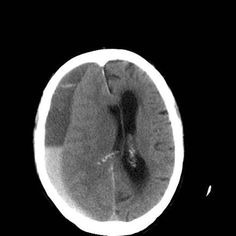

In [ ]:
new_img=imread('/content/drive/MyDrive/Brain_Tumor/Testing/notumor/Te-noTr_0000.jpg')
new_img

In [ ]:
resized_img=resize(new_img,(150,150,1))
resized_img.shape

(150, 150, 1)

In [ ]:
img=resized_img.reshape(1,150,150,1)
img.shape

(1, 150, 150, 1)

In [ ]:
pred=model.predict(img)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


array([[9.9283408e-11, 6.2755549e-05, 9.9993730e-01, 1.3055286e-14]],
      dtype=float32)

In [ ]:
ind=pred.argmax()
ind

np.int64(2)

In [ ]:
categories[ind]

'notumor'

we can do it like the above or like below in a function

In [ ]:
def predict_new(img,model):
  img_resized=resize(img,(150,150,1))
  img_reshaped=img_resized.reshape(1,150,150,1)
  pred=model.predict(img_reshaped)
  ind=pred.argmax()
  categories=['glioma','meningioma','notumor','pituitary']
  print(categories[ind])

In [ ]:
imgpath=input('Enter the image path')
img=imread(imgpath)
predict_new(img,model)

Enter the image path/content/drive/MyDrive/Brain_Tumor/Testing/meningioma/Te-meTr_0003.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
meningioma
